### 1) Importing Libraries

#### Standard Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from sklearn.datasets import load_files 
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/angelfelipemagnossaodepaula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Downloading Files from Google Drive

In [2]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

import os

In [3]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [4]:
# Downloading Headlines train and Test Data from google drive
# PS: the traing data is public and was downloaded to drive from:
#        https://bitbucket.org/ssix-project/semeval-2017-task-5-subtask-2/raw/46143dc3c0c28b9286b6d1d424d1359c8f49d6cc/Headline_Trainingdata.json
#     while the test data is avaliable n the same repo, but without labels
#     the one used here was requested by e-mail, and contains labels

# files_list = {'full_dict.txt': '1_ZBh3oFm3CYDqG3IcVY-ukG0-vsiulTp',
#               'train.csv': '1Tjy8fxm63Yg9n7EemvJ_G_Fbs6Y6SQEC',
#               'test.csv': '1NAQTM-0ynAQJ8CjHZ1AaxuMIuvuYjrgq',
#               'SenVal_Functions.py': '1QgNS3191Q87tdXgyyJLrOqAlQf3wjki4'}

# for filename, gdrive_id in files_list.items():
#   exists = os.path.isfile('/content/' + filename)
  
#   if not exists:
#     drive.CreateFile({'id': gdrive_id}).GetContentFile(filename)
#     print('File {} was downloaded.'.format(filename))
#   else:
#     print('File {} not downloaded because already on system.'.format(filename))

#### SenVal Evaluation Metric

In [5]:
from SenVal_Functions import SenVal_metric
from sklearn.metrics import make_scorer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/angelfelipemagnossaodepaula/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
from SenVal_Functions import SenVal_metric
from sklearn.metrics import make_scorer

#New scoring function
scoring_SenVal = make_scorer(SenVal_metric)

####  NLP

In [7]:
from SenVal_Functions import NLP_pre_processing

#### Dictionaries

In [8]:
#Dictionary with all the words in the corpus and only these
with open("full_dict.txt", "rb") as fp:   # Unpickling
    full_dict = pickle.load(fp)

In [9]:
# Download dictionary WORDS from nltk
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     /Users/angelfelipemagnossaodepaula/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

### 2) Load files

In [10]:
#test
df_test = pd.read_csv('test.csv', index_col='id')
#train
df_train = pd.read_csv('train.csv', index_col='id')

### 3) Split dataset in " Title " and " Label "

In [11]:
#Train_Title
train_title = []
for n in df_train['title']:
    train_title.append(n)
    
#Train_Label
train_label = df_train['sentiment_NB'].values 

In [0]:
#Test_Title
test_title = []
for n in df_test['title']:
    test_title.append(n)
      
#Test_Label
test_label = df_test['sentiment_range'].values

### 4) Text Preprocessing

In [0]:
# Applying the NLP_pre_processing function 

#Train
documents_train = NLP_pre_processing(train_title)
#Test
documents_test = NLP_pre_processing(test_title)

### 5) Converting Text to Numbers 

#### Dictionary Preparation

In [0]:
# Import dictionary WORDS from nltk
from nltk.corpus import words

In [0]:
# Convert dictionary to set and add it into" vocab "
vocab = set(words.words())

#### Bag of Words

In [0]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
#Train
vectorizer_train = CountVectorizer(max_features=1500, vocabulary= vocab, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
train_title = vectorizer_train.fit_transform(documents_train).toarray()

In [0]:
#Test
vectorizer_test = CountVectorizer(max_features=1500, vocabulary= vocab, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
test_title = vectorizer_test.fit_transform(documents_test).toarray()

#### Finding TFIDF

In [0]:
# Import TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
#Train
tfidfconverter_train = TfidfTransformer()
train_title = tfidfconverter_train.fit_transform(train_title).toarray()

In [0]:
#Test
tfidfconverter_test = TfidfTransformer()
test_title = tfidfconverter_test.fit_transform(test_title).toarray()

### 6) Split tdata

In [0]:
# Import train_test_split
from sklearn.model_selection import train_test_split  

In [0]:
#Train and Validation
X_train = train_title
y_train = train_label

In [0]:
#Test
X_test = test_title
y_test = test_label

### 7) Create a Naive Bayes Model

#### Import the Naive Bayes algorithms 

In [0]:
# Import Import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#### Set the Naive Bayes model

In [0]:
# Set the classifier_1
classifier_1 =  GaussianNB()

### 8) Cross Validation

#### Implement cross validation

In [0]:
#It is StratifiedKFold cross validation
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=classifier_1, scoring= 'accuracy', X=X_train, y=y_train, cv=10, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/angelfelipemagnossaodepaula/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.6min finished


#### Print the accuracies

In [0]:
print(all_accuracies)

[0.224      0.23966942 0.22033898 0.21186441 0.16521739 0.20535714
 0.23853211 0.19266055 0.21296296 0.21495327]


#### Print the average of all the accuracies

In [0]:
print(all_accuracies.mean())

0.21255562400210617


### 9) Predicting Sentiment

#### Training Using the full " train dataset " 

In [0]:
#Test
X_train_full = train_title
y_train_full = train_label

In [0]:
# Set the classifier
classifier_2 =  GaussianNB ()
classifier_2.fit(X_train_full, y_train_full)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Prediction

In [0]:
y_pred = classifier_2.predict(X_test)

#### Transforme the predict labels for Regression stamps

In [0]:
#Reshape and transform the predict result to the old problem scale
y_pred = (y_pred / 10)-1

### 10) Evaluating the Model

#### Ordinary metrics

In [0]:
# Import Import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test,y_pred))  
print('Mean Squred Error:', mean_squared_error(y_test,y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.3196354378818737
Mean Squred Error: 0.20052752953156827
Root Mean Squared Error: 0.4478030030399174


#### SanVal metric

In [0]:
#Reshape matrix
#Predict
y_pred=y_pred.reshape(1,-1)
#Label
y_test=y_test.reshape(1,-1)

In [0]:
SenVal_metric(y_test, y_pred)

array([[0.43028183]])

### 11) Learning Curve

In [0]:
# Import curve/plot
from SenVal_Functions import plot_learning_curve

In [0]:
# Set the of learn curve plot
estimator = GaussianNB ()
title = r"Learning Curves (Regression Naive Bayses)"
xlim= None
ylim=(0, 1)
y_label="Score"
scoring ='accuracy'
cv=10
n_jobs=-1

/Users/angelfelipemagnossaodepaula/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


<module 'matplotlib.pyplot' from '/Users/angelfelipemagnossaodepaula/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

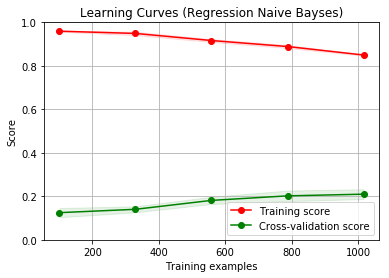

In [0]:
#Apply learning Curve
plot_learning_curve(estimator, title, X_train_full, y_train_full, xlim, ylim, cv, n_jobs, scoring ,y_label, kind='classificatin')

### 12) Saving and Loading the Model

In [0]:
with open('Naive_Bayes_classifier', 'wb') as picklefile:
    pickle.dump(classifier_2,picklefile)

In [0]:
#Load Model
#with open('text_classifier', 'rb') as training_model:  
    #model = pickle.load(training_model)